<img src='Day 9 Students files/scalar,vector,matrix.png' >
<img src='Day 9 Students files/scalar,vector,matrix2.png' >

In [1]:
# pip install tensorflow

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-03-22 22:10:59.072420: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Classification

In [3]:
df=pd.read_csv("Day 9 Students files/pima-indians-diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [9]:
# x=df.drop('Outcome', axis=1)

In [10]:
# Our goal is to determine whether they have diabetes or not.
# y=df[['Outcome']] 

In [11]:
# more Pratical code writing 
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [12]:
from sklearn.preprocessing import normalize, scale # Z-Score

In [13]:
x=scale(x)

In [14]:
model=Sequential()
# 8 nöron sayısı - Dense layer ekleiyoruz.
# Amacımız birinci nöronun ikinci layerda ki tüm nöronlara bağlanacağını belirtiyoruz.
model.add(Dense(8,activation="relu"))
model.add(Dense(120,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(4,activation="relu")) #üçüncü layer
model.add(Dense(1,activation="sigmoid")) #son layer ın aktivasyon fonksiyonu Sigmoid Evet veya Hayır cevabı dönecek
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])


In [15]:
# We can see the result with #verbose=1 below. It processes by taking 10 rows with batch_size=10 at a time.
model.fit(x,y,epochs=250,batch_size=32,validation_split=.20, verbose=1) # nöronlar arasi gidip gelme islemi epochs - yol

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5894 - loss: 0.6886 - val_accuracy: 0.7532 - val_loss: 0.6768
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - loss: 0.6607 - val_accuracy: 0.7468 - val_loss: 0.6588
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7724 - loss: 0.6139 - val_accuracy: 0.7013 - val_loss: 0.6368
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7497 - loss: 0.5735 - val_accuracy: 0.7273 - val_loss: 0.6175
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7546 - loss: 0.5360 - val_accuracy: 0.7208 - val_loss: 0.6146
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7608 - loss: 0.4958 - val_accuracy: 0.7208 - val_loss: 0.5968
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7662 - loss: 0.5245 - val_accuracy: 0.7143 - val_loss: 0.6034
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7753 - loss: 0.4920 - val_accuracy: 0.7273 - 

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,511 (111.38 KB)

 Trainable params: 9,503 (37.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,008 (74.25 KB)

In [17]:
scores=model.evaluate(x,y) # Success rate

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9829 - loss: 0.1170 


In [18]:
scores[0] # Unsuccess rate

0.5033089518547058

In [19]:
scores[1] # Success rate

0.9296875

In [20]:
#Early stopping - 150 epoch  belirledik en uygun epoch un belirlenmesine Early epoch denilmektedir.

In [21]:
history=model.fit(x,y,epochs=250,validation_split=0.20,batch_size=32,verbose=1)

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9973 - loss: 0.0258 - val_accuracy: 0.6558 - val_loss: 2.4046
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9888 - loss: 0.0381 - val_accuracy: 0.6558 - val_loss: 2.4402
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9796 - loss: 0.0583 - val_accuracy: 0.6558 - val_loss: 2.5158
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9900 - loss: 0.0353 - val_accuracy: 0.6558 - val_loss: 2.4364
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0288 - val_accuracy: 0.6558 - val_loss: 2.4664
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0273 - val_accuracy: 0.6753 - val_loss: 2.3718
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.6623 - val_loss: 2.4025
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.0296 - val_accuracy: 0.6558 - v

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9466 - loss: 0.1568 - val_accuracy: 0.6818 - val_loss: 2.3319
Epoch 202/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9535 - loss: 0.1460 - val_accuracy: 0.6688 - val_loss: 2.3996
Epoch 203/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9419 - loss: 0.1659 - val_accuracy: 0.6429 - val_loss: 2.3353
Epoch 204/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9407 - loss: 0.1602 - val_accuracy: 0.6623 - val_loss: 2.3454
Epoch 205/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9494 - loss: 0.1632 - val_accuracy: 0.6623 - val_loss: 2.3026
Epoch 206/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9391 - loss: 0.1778 - val_accuracy: 0.6883 - val_loss: 2.3498
Epoch 207/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9495 - loss: 0.1593 - val_accuracy: 0.6753 - val_loss: 2.4207
Epoch 208/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9472 - loss: 0.1609 - val_accuracy: 0.6818 -

In [22]:
import matplotlib.pyplot as plt

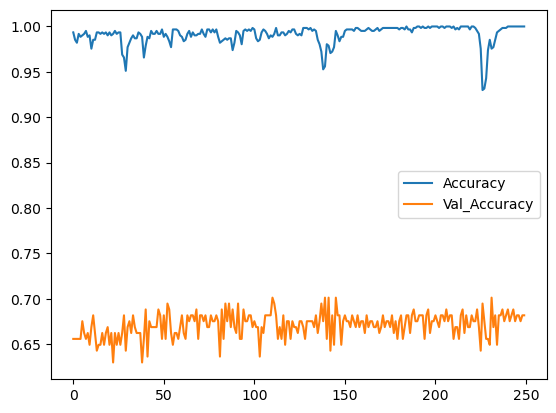

In [23]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

In [24]:
#layer sayısını artırmak 
#nöron sayısını artırmak
#başarı sayısını artırır

### DNN - Regression

In [25]:
import pandas as pd
pd.set_option("display.max_columns",100) #tüm sütunları görmek için 
df=pd.read_pickle("Day 9 Students files/kc_house.pkl")

In [26]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,condition,sqft_above,price,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,3,1180,221900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,3,2170,538000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,3,770,180000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,5,1050,604000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,3,1680,510000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 19034, dtype: float64

In [28]:
x= df.drop("price",axis=1) # Other rows except price
y=df["price"]

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [31]:
model=Sequential()
model.add(Dense(120,activation="relu")) # dense layer tüm nöronlar birbirine bağlanmış demektir.
model.add(Dense(80,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(24,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam",loss="mse")

In [32]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=1000, verbose=0)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 120)            │         9,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,045 (324.40 KB)

 Trainable params: 27,681 (108.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,364 (216.27 KB)

In [33]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

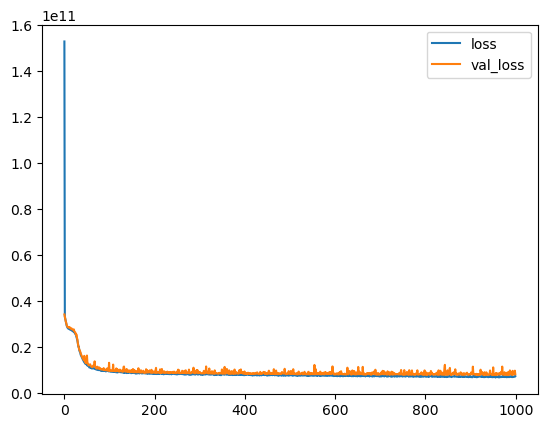

In [34]:
loss_df.plot()

In [35]:
guess=model.predict(x)

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
r2_score(guess,y)

0.8338766356276214

In [38]:
(mean_squared_error(guess,y))**0.5

85211.5221853664